In [1]:
from PIL import Image, ImageDraw, ImageFont
import dotenv
import openai
import base64
import os
from typing import List, Tuple
import json
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import BytesIO
class CustomError(Exception):
    pass


In [22]:
#from .env import enviroment variable
dotenv.load_dotenv() 
#initialize API key
client = openai.OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

In [3]:

def get_image_path(image_num,image_folder = "image_20230426-57195279-1"):
    #get image_path from {image_folder}/{image_num}.png
    #image (png) path
    return image_folder + "/" + image_num +  ".png"


In [4]:
def encode_image(image_path): 
    #function to encode image as base64  
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [5]:

def create_vision_chat_by_json(question,image_path, temperature=1):
    #ask gpt-4o and get the answer about object name detected in the input image as well as bounding box x1,y1,x2,y2, confidence probability and image size
    #The answer is going to be out by json format below
    """
    "name": {
        "type": "array",
        "items": {
            "type": "string"
        },
        "description":"A list of object names detected in the image, based on the LVIS (Large Vocabulary Instance Segmentation) dataset, including as many as possible, even with low confidence scores."
    },
    "x1_rect": {
        "type": "array",
        "items": {
            "type": "integer"
        },
        "description": "List of x-coordinates for the top-left corner of each object's bounding box"
    },
    "x2_rect": {
        "type": "array",
        "items": {
            "type": "integer"
        },
        "description": "List of x-coordinates for the bottom-right corner of each object's bounding box"
    },
    "y1_rect": {
        "type": "array",
        "items": {
            "type": "integer"
        },
        "description": "List of y-coordinates for the top-left corner of each object's bounding box"
    },
    "y2_rect": {
        "type": "array",
        "items": {
            "type": "integer"
        },
        "description": "List of y-coordinates for the bottom-right corner of each object's bounding box"
    },
    "probability": {
        "type": "array",
        "items": {
            "type": "integer"
        },
        "description": "An array of probability values, each representing the likelihood of the corresponding object being correctly detected."
    },
    "size": {
        "type": "array",
        "items": {
            "type": "integer"
        },
        "description": "An array of image sizes (width and height) to retrieve."
    } 
    """
    if not os.path.exists(image_path):
        return "指定された画像ファイルが見つかりません。"
    try:
        base64_image = encode_image(image_path)

        messages = [
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": question},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
                    },
                ],
            }
        ]

        res = client.beta.chat.completions.parse(
            model="gpt-4o",
            messages=messages,
            
            response_format = {
                "type": "json_schema",
                "json_schema": {
                    "name": "ObjectRecognitionResults",
                    "schema": {
                        "type": "object",
                        "properties": {
                            "name": {
                                "type": "array",
                                "items": {
                                    "type": "string"
                                },
                                "description":"A list of object names detected in the image, based on the LVIS (Large Vocabulary Instance Segmentation) dataset, including as many as possible, even with low confidence scores."
                            },
                            "x1_rect": {
                                "type": "array",
                                "items": {
                                    "type": "integer"
                                },
                                "description": "List of x-coordinates for the top-left corner of each object's bounding box"
                            },
                            "x2_rect": {
                                "type": "array",
                                "items": {
                                    "type": "integer"
                                },
                                "description": "List of x-coordinates for the bottom-right corner of each object's bounding box"
                            },
                            "y1_rect": {
                                "type": "array",
                                "items": {
                                    "type": "integer"
                                },
                                "description": "List of y-coordinates for the top-left corner of each object's bounding box"
                            },
                            "y2_rect": {
                                "type": "array",
                                "items": {
                                    "type": "integer"
                                },
                                "description": "List of y-coordinates for the bottom-right corner of each object's bounding box"
                            },
                            "probability": {
                                "type": "array",
                                "items": {
                                    "type": "integer"
                                },
                                "description": "An array of probability values, each representing the likelihood of the corresponding object being correctly detected."
                            },
                            "size": {
                                "type": "array",
                                "items": {
                                    "type": "integer"
                                },
                                "description": "An array of image sizes (width and height) to retrieve."
                            } 
                        },
                    }
                }   
            },

            temperature = temperature,
            max_tokens=300
        )
        return res.choices[0].message.content
    except Exception as e:
        return f"画像の処理中にエラーが発生しました: {str(e)}"

In [6]:
#This is unused code
"""
def create_vision_chat_by_prompt(question,image_path, temperature=1):
    if not os.path.exists(image_path):
        return "指定された画像ファイルが見つかりません。"
    try:
        base64_image = encode_image(image_path)

        messages = [
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": question},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
                    },
                ],
            }
        ]

        res = client.beta.chat.completions.parse(
            model="gpt-4o",
            messages=messages,

            temperature = temperature,
            max_tokens=300
        )
        return res.choices[0].message.content
    except Exception as e:
        return f"画像の処理中にエラーが発生しました: {str(e)}"
"""

'\ndef create_vision_chat_by_prompt(question,image_path, temperature=1):\n    if not os.path.exists(image_path):\n        return "指定された画像ファイルが見つかりません。"\n    try:\n        base64_image = encode_image(image_path)\n\n        messages = [\n            {\n                "role": "user",\n                "content": [\n                    {"type": "text", "text": question},\n                    {\n                        "type": "image_url",\n                        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},\n                    },\n                ],\n            }\n        ]\n\n        res = client.beta.chat.completions.parse(\n            model="gpt-4o",\n            messages=messages,\n\n            temperature = temperature,\n            max_tokens=300\n        )\n        return res.choices[0].message.content\n    except Exception as e:\n        return f"画像の処理中にエラーが発生しました: {str(e)}"\n'

In [7]:
# prompt 
def prompt1(image_num):
    question="Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores"
    response = create_vision_chat_by_json(question, get_image_path(image_num))
    print("質問:"+question+"\n回答:")
    print(response)
    return response

# prompt2 (This is unused file)
"""
def prompt2(image_num):
    question = "Given an image, identify the objects as many as possible. For each detected object, please provide the following details in a structured JSON format:\n"\
               "- `name`: An array containing the names of all detected objects, based on the LVIS (Large Vocabulary Instance Segmentation) dataset.\n"\
               "- `x1_rect`: An array of x-coordinates for the top-left corner of each object's bounding box.\n"\
               "- `y1_rect`: An array of y-coordinates for the top-left corner of each object's bounding box.\n"\
               "- `x2_rect`: An array of x-coordinates for the bottom-right corner of each object's bounding box.\n"\
               "- `y2_rect`: An array of y-coordinates for the bottom-right corner of each object's bounding box.\n"\
               "- `probability`: An array of probability values, each representing the likelihood of the corresponding object being correctly detected.\n\n"\
               "Ensure the output strictly adheres to the following JSON schema format:\n\n"\
               "```json\n"\
               "{\n"\
               "    \"name\": [\"object1\", \"object2\", ...],\n"\
               "    \"x1_rect\": [x1, x2, ...],\n"\
               "    \"y1_rect\": [y1, y2, ...],\n"\
               "    \"x2_rect\": [x1, x2, ...],\n"\
               "    \"y2_rect\": [y1, y2, ...],\n"\
               "    \"probability\": [prob1, prob2, ...]\n"\
               "}\n"\
               "```"


    response = create_vision_chat_by_prompt(question, get_image_path(image_num))
    print("質問:"+question+"\n回答:")
    print(response)
    return response
"""

'\ndef prompt2(image_num):\n    question = "Given an image, identify the objects as many as possible. For each detected object, please provide the following details in a structured JSON format:\n"               "- `name`: An array containing the names of all detected objects, based on the LVIS (Large Vocabulary Instance Segmentation) dataset.\n"               "- `x1_rect`: An array of x-coordinates for the top-left corner of each object\'s bounding box.\n"               "- `y1_rect`: An array of y-coordinates for the top-left corner of each object\'s bounding box.\n"               "- `x2_rect`: An array of x-coordinates for the bottom-right corner of each object\'s bounding box.\n"               "- `y2_rect`: An array of y-coordinates for the bottom-right corner of each object\'s bounding box.\n"               "- `probability`: An array of probability values, each representing the likelihood of the corresponding object being correctly detected.\n\n"               "Ensure the output str

In [8]:
#function to show bb box on an image
def add_bboxes_to_image(ax, image: np.ndarray,
                        bboxes: List[Tuple[int, int, int, int]],
                        labels: List[str] = None,
                        label_size: int = 10,
                        line_width: int = 2,
                        border_color=(0, 1, 0, 1)) -> None:
    """
    Add bbox to ax

    :param image: dtype=np.uint8
    :param bbox: [(left, top, right, bottom)]
    :param label: List[str] or None
    :return: ax
    """
    # Display the image
    ax.imshow(image)

    if labels is None:
        labels = [None] * len(bboxes)

    for bbox, label in zip(bboxes, labels):
        # Add bounding box
        left, top, right, bottom = bbox
        rect = patches.Rectangle((left, top), right - left, bottom - top,
                                 linewidth=line_width,
                                 edgecolor=border_color,
                                 facecolor='none')
        ax.add_patch(rect)

        # label
        if label:
            bbox_props = dict(boxstyle="square,pad=0",
                              linewidth=line_width, facecolor=border_color,
                              edgecolor=border_color)
            ax.text(left, top, label,
                    ha="left", va="bottom", rotation=0,
                    size=label_size, bbox=bbox_props)
    return ax

In [55]:
def change_result_to_list(response,image_num,som=False,col=10,row=10):
    #change response json data from gpt into list data
    #list format will be below 
    #return:  cols=[[width,height]['object_name','x1','y1','x2','y2','probability',image_num], ...]

    #resoonse: response json data from gpt
    #image_num : image id like '001' '067'
    #som: if you are using prompt_som, you should set this True
    #col: grid width (available only by som)
    #row: grid height(available only by som)


    img = Image.open(get_image_path(image_num))

    data = json.loads(response)
    result = [data["size"]]

    if som:
        for i in range(len(data["name"])):
            
            numbers = data["numbers"][i] 
            sorted_numbers = sorted(numbers)
            first_numbers_sorted = sorted([x % 10 for x in numbers])
            if first_numbers_sorted[0] == 0:
                first_numbers_sorted = [x for x in first_numbers_sorted if x != 0]
                first_numbers_sorted.append(10)

            if sorted_numbers[0] % col == 0:
                x1 =  9 *  (img.size[0] // col)
            else:
                x1 =  ((sorted_numbers[0]%col)  -1) *  (img.size[0] // col)

            y1 =  (sorted_numbers[0]//row) *  (img.size[1] // row)

            if first_numbers_sorted[-1]%col == 0:
                x2 =  10 *  (img.size[0] // col)                
            else:
                x2 =  ((first_numbers_sorted[-1]%col)) *  (img.size[0] // col)

            if sorted_numbers[-1] % row ==0:
                y2 =  (sorted_numbers[-1]//row) * (img.size[1] // row)  
            else:
                y2 =  (sorted_numbers[-1]//row+1) * (img.size[1] // row)  
         

            item = [
                data["name"][i],
                x1,
                y1,
                x2,
                y2,
                data["probability"][i],
                image_num
            ]

            
            result.append(item)
        return result
    else:

        # リスト形式に変換
        for i in range(len(data["name"])):
            item = [
                data["name"][i],
                data["x1_rect"][i],
                data["y1_rect"][i],
                data["x2_rect"][i],
                data["y2_rect"][i],
                data["probability"][i],
                image_num
            ]
            result.append(item)
        return result



def get_bboxes_and_objects(cols):
    #return bounding boxes and objects name list
    #return: bounding boxes list[[x1,y1,x2,y2],...],object names[name,...]
    #input is below
    #cols=[[width,height]['object_name','x1','y1','x2','y2','probability',image_num], ...]
    objects = []
    bboxes = []
    for col in cols[1:]:
        if col[5] >= 0:
            objects.append(f"{col[0]},{col[5]}")
        else:
            objects.append(f"{col[0]}")
        bbox = (col[1],col[2],col[3],col[4])
        bboxes.append(bbox)
    return bboxes,objects



In [11]:
def get_answer_cols(image_num , answer_path = "visualannotation20230426-57195279-1.json"):
    #get answer data by list format below
    #return: [[width,height]['object_name','x1','y1','x2','y2',-1,image_num,instanceId], ...]
    #input: image id number
    img = Image.open(get_image_path(image_num))
    
    answer_cols = [img.size]
    answer_file = open(answer_path,'r')
    answer_dict = json.load(answer_file)



    for image in answer_dict['images']:
        if image['imageId'] == image_num:
            for bb in image['boundingBoxes']:
                answer_save = []
                answer_save.append(bb['className'])
                answer_save.append(bb["rect"]["x1"])
                answer_save.append(bb["rect"]["y1"])
                answer_save.append(bb["rect"]["x2"])
                answer_save.append(bb["rect"]["y2"])
                answer_save.append(-1)
                answer_save.append(image_num)
                answer_save.append(bb["instanceId"])
                answer_cols.append(answer_save)
                    
            return answer_cols
            
    raise CustomError(f"該当する画像がありません:{image_num}")


In [12]:
def adjust_bboxes(pred,answer):
    #adjust bounding box to answer size
    #pred = [[width,height]['object_name','x1','y1','x2','y2','probability',image_num], ...]
    #answer = [[width,height]['object_name','x1','y1','x2','y2',-1,image_num,instanceId], ...]
    w_pred = pred[0][0]
    w_ans = answer[0][0]

    p = w_ans / w_pred

    pred_adjusted = [[int(pred[0][0]*p),int(pred[0][1]*p)]]

    for object in pred[1:]:
        pred_adjusted_save = []
        pred_adjusted_save.append(object[0])
        pred_adjusted_save.append(int(int(object[1])*p))
        pred_adjusted_save.append(int(int(object[2])*p))
        pred_adjusted_save.append(int(int(object[3])*p))
        pred_adjusted_save.append(int(int(object[4])*p))
        pred_adjusted_save.append(object[5])
        pred_adjusted_save.append(object[6])
        pred_adjusted.append(pred_adjusted_save)
    return pred_adjusted
 

In [50]:
def get_pred_and_ans(image_num,adjust= False):
    #pred = [[width,height]['object_name','x1','y1','x2','y2','probability',image_num], ...]
    #answer = [[width,height]['object_name','x1','y1','x2','y2',-1,image_num,instanceId], ...]   

    # ask gpt-4o
    res = prompt1(image_num)
    data = json.loads(res)

    #get answer
    ans = get_answer_cols(image_num)

    # show gpt-4o result
    pred = change_result_to_list(res, image_num)
    if adjust:
        pred_adjusted = adjust_bboxes(pred,ans)
        return pred_adjusted,ans,pred

    return pred,ans



def show_three_pics_by_json(image_num,adjust= False,compare = False):
    img = Image.open(get_image_path(image_num))

    # show size
    print(img.size)
    image = np.array(img)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # show raw image
    axes[0].imshow(image)
    axes[0].set_title("Raw Image")
    axes[0].axis("off")

    result,ans,pred = get_pred_and_ans(image_num,adjust)
    
    bboxes, objects = get_bboxes_and_objects(result)
    add_bboxes_to_image(axes[1], np.uint8(image), bboxes, objects)
    axes[1].set_title(f"GPT-4o Result (w:{result[0][0]},h:{result[0][1]}),Adjust:{adjust}")
    axes[1].axis("off")

    # show answer data
    bboxes, objects = get_bboxes_and_objects(ans)
    add_bboxes_to_image(axes[2], np.uint8(image), bboxes, objects)
    axes[2].set_title(f"Answer Data (w:{ans[0][0]},h:{ans[0][1]})")
    axes[2].axis("off")

    # show
    plt.tight_layout()
    plt.show()

    if compare and adjust:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
        # show raw image
        axes[0].imshow(image)
        axes[0].set_title("Raw Image")
        axes[0].axis("off")

        bboxes, objects = get_bboxes_and_objects(pred)
        add_bboxes_to_image(axes[1], np.uint8(image), bboxes, objects)
        axes[1].set_title(f"GPT-4o Result (w:{pred[0][0]},h:{pred[0][1]}),Adjust:False")
        axes[1].axis("off")

        # show answer data
        bboxes, objects = get_bboxes_and_objects(ans)
        add_bboxes_to_image(axes[2], np.uint8(image), bboxes, objects)
        axes[2].set_title(f"Answer Data (w:{ans[0][0]},h:{ans[0][1]})")
        axes[2].axis("off")

        # show
        plt.tight_layout()
        plt.show()

    


"""    
def show_three_pics_by_prompt(image_num):
    img = Image.open(get_image_path(image_num))

    # show size
    print(img.size)
    image = np.array(img)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # show raw image
    axes[0].imshow(image)
    axes[0].set_title("Raw Image")
    axes[0].axis("off")

    # ask gpt-4o
    res = prompt2(image_num)
    data = json.loads(res)

    # show gpt-4o result
    result = []
    append_result_to_list(result, res, image_num)
    bboxes, objects = get_bboxes_and_objects(result)
    add_bboxes_to_image(axes[1], np.uint8(image), bboxes, objects)
    axes[1].set_title("GPT-4o Result")
    axes[1].axis("off")

    # show answer data
    ans = get_answer_cols(image_num)
    bboxes, objects = get_bboxes_and_objects(ans)
    add_bboxes_to_image(axes[2], np.uint8(image), bboxes, objects)
    axes[2].set_title("Answer Data")
    axes[2].axis("off")

    # show
    plt.tight_layout()
    plt.show()
"""
    

'    \ndef show_three_pics_by_prompt(image_num):\n    img = Image.open(get_image_path(image_num))\n\n    # show size\n    print(img.size)\n    image = np.array(img)\n    \n    fig, axes = plt.subplots(1, 3, figsize=(15, 5))\n    \n    # show raw image\n    axes[0].imshow(image)\n    axes[0].set_title("Raw Image")\n    axes[0].axis("off")\n\n    # ask gpt-4o\n    res = prompt2(image_num)\n    data = json.loads(res)\n\n    # show gpt-4o result\n    result = []\n    append_result_to_list(result, res, image_num)\n    bboxes, objects = get_bboxes_and_objects(result)\n    add_bboxes_to_image(axes[1], np.uint8(image), bboxes, objects)\n    axes[1].set_title("GPT-4o Result")\n    axes[1].axis("off")\n\n    # show answer data\n    ans = get_answer_cols(image_num)\n    bboxes, objects = get_bboxes_and_objects(ans)\n    add_bboxes_to_image(axes[2], np.uint8(image), bboxes, objects)\n    axes[2].set_title("Answer Data")\n    axes[2].axis("off")\n\n    # show\n    plt.tight_layout()\n    plt.show()

In [14]:
def IoU(x1,y1,x2,y2,ansx1,ansy1,ansx2,ansy2):
    x1 = int(x1)
    y1 = int(y1)
    x2 = int(x2)
    y2 = int(y2)
    ansx1 = int(ansx1)
    ansy1 = int(ansy1)
    ansx2 = int(ansx2)
    ansy2 = int(ansy2)
    
    x1_max = max(x1, ansx1)
    y1_max = max(y1, ansy1)
    x2_min = min(x2, ansx2)
    y2_min = min(y2, ansy2)
    and_width = max(0, x2_min - x1_max)
    and_height = max(0, y2_min - y1_max)
    and_area = and_width * and_height
    
    pred_area = (x2-x1)*(y2-y1)
    ans_area =(ansx2-ansx1)*(ansy2-ansy1)
    or_area = pred_area + ans_area - and_area

    IoU = and_area / or_area if or_area > 0 else 0

    return IoU

#重複した中で椅子がどれを指しているのか → iouが最も大きいものを採用でいい?
def delete_duplication(pred_col,answer_cols):
    output_flag = False
    max_iou = -1
    max_answer_col = [0] * len(answer_cols[0])

    for answer_col in answer_cols:
        if pred_col[0] in answer_col[0] :
            output = True
            iou = IoU(pred_col[1],pred_col[2],pred_col[3],pred_col[4],answer_col[1],answer_col[2],answer_col[3],answer_col[4])
            if max_iou <= iou:
                max_iou = iou
                max_answer_col = answer_col

    
    
    return max_answer_col,max_iou,output_flag



def get_IoU_list(pred_cols,answer_cols):

    IoUs = []
    for pred_col in pred_cols[1:]:
        answer_col,iou,output_flag = delete_duplication(pred_col,answer_cols[1:])
        IoUs.append(iou)
  
    return IoUs




(1920, 1080)
質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["table","flowers","placemat"],"x1_rect":[303,462,482],"y1_rect":[42,55,49],"x2_rect":[981,578,604],"y2_rect":[720,153,153],"probability":[91,88,76],"size":[1365,768]}


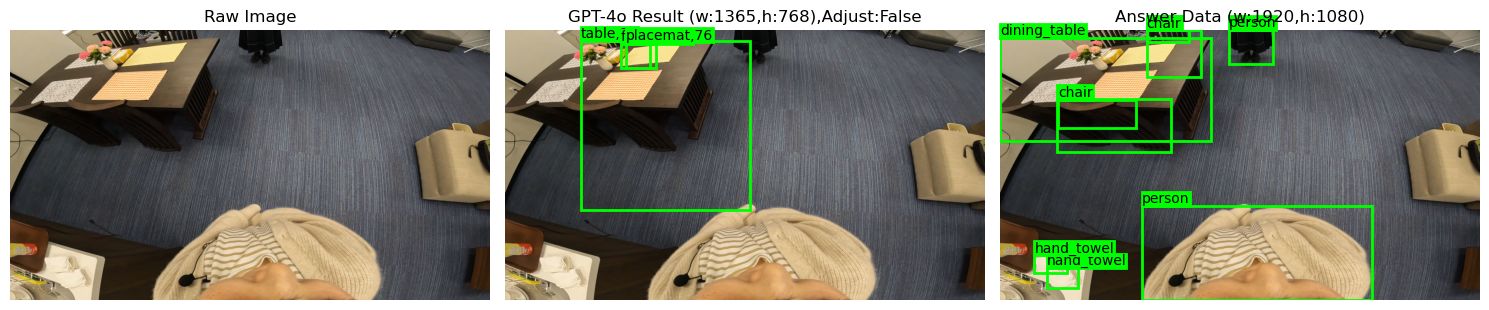

In [24]:
show_three_pics_by_json('001')

(1920, 1080)
質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["vase","flowers","tablecloth","tissue box","person"],"x1_rect":[480,480,300,650,950],"y1_rect":[150,150,270,170,600],"x2_rect":[620,600,620,820,1110],"y2_rect":[370,340,440,300,690],"probability":[95,90,89,87,85],"size":[1365,768]}


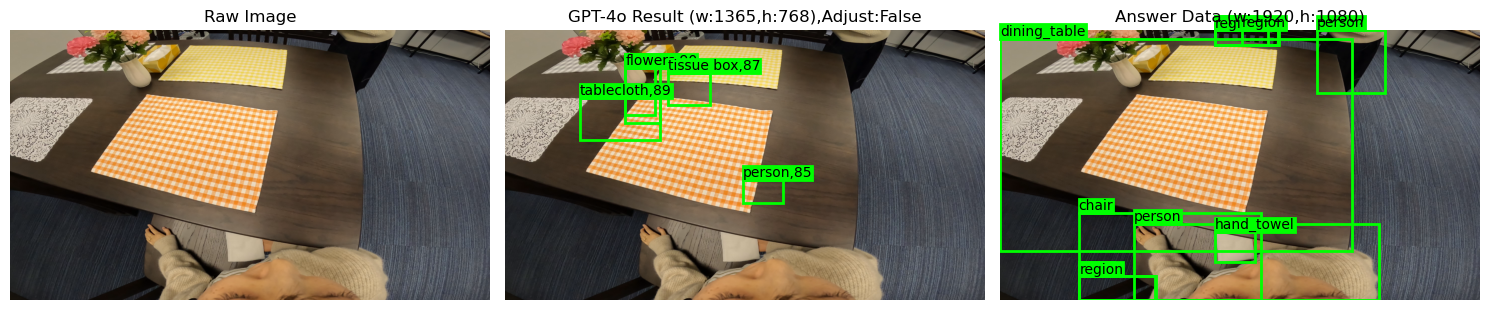

In [15]:
show_three_pics_by_json('030')

(1920, 1080)
質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["table","flowers","chair","cloth","person"],"x1_rect":[285,1055,214,576,108],"x2_rect":[1558,1348,418,1034,315],"y1_rect":[281,155,506,417,68],"y2_rect":[934,564,768,766,384],"probability":[95,92,85,88,98],"size":[1365,768]}


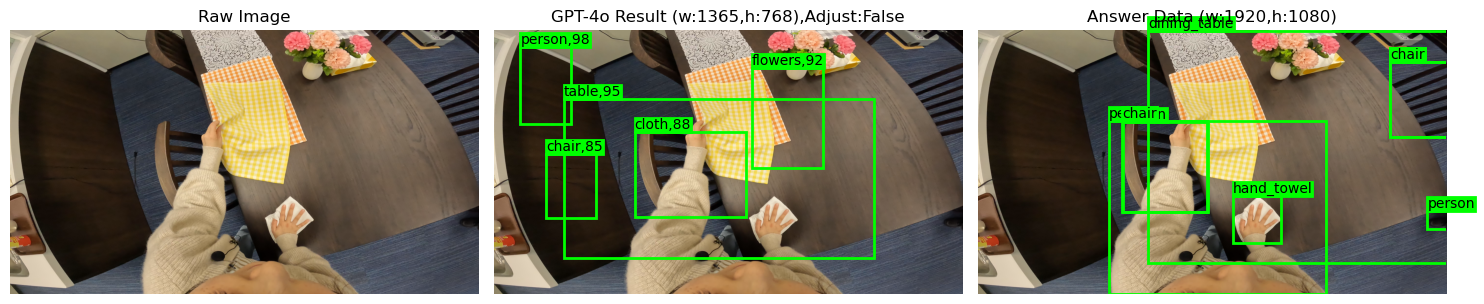

In [16]:
show_three_pics_by_json('070')

(1920, 1080)
質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["chair","table cloth","person","sweater","napkin"],"x1_rect":[360,1642,592,592,890],"y1_rect":[736,432,568,1296,748],"x2_rect":[572,1914,1082,1084,1042],"y2_rect":[1384,784,1192,1624,956],"probability":[90,85,95,88,80],"size":[1365,768]}


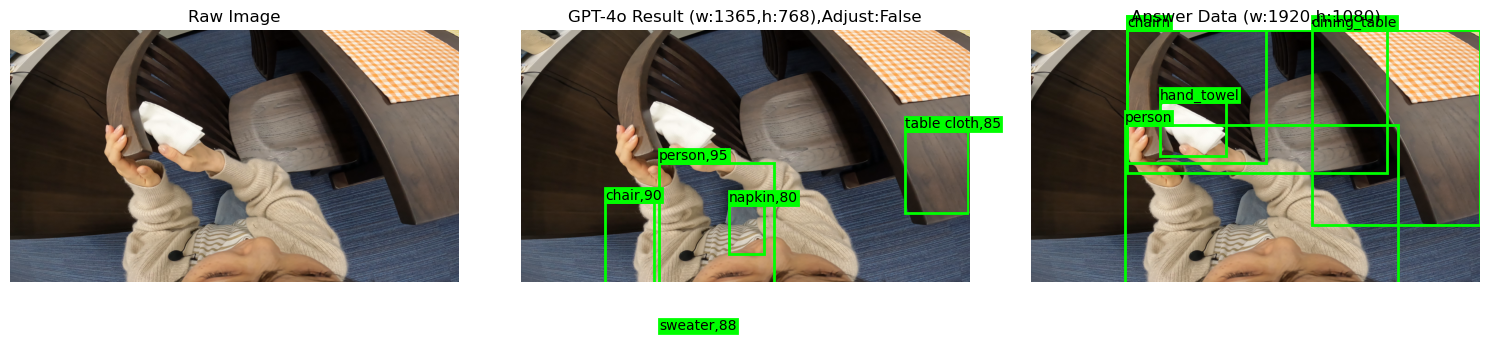

In [17]:
show_three_pics_by_json('040')

(1920, 1080)
質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["person","chair","sink","tray","cup","bowl","napkin"],"x1_rect":[275,889,202,1063,1037,1123,731],"x2_rect":[877,1071,626,1257,1095,1163,875],"y1_rect":[166,481,179,261,197,331,168],"y2_rect":[667,678,466,448,239,371,292],"probability":[93,85,82,78,77,75,70],"size":[1365,768]}


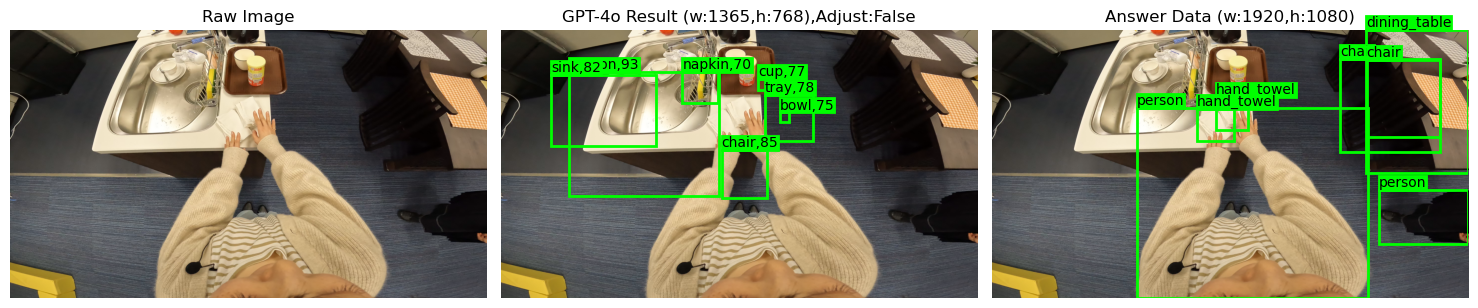

In [18]:
show_three_pics_by_json('008')

(1920, 1080)
質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["table","vase","person","cupboard"],"x1_rect":[100,250,500,0],"y1_rect":[50,150,20,400],"x2_rect":[400,300,580,200],"y2_rect":[300,200,150,600],"probability":[80,70,85,60],"size":[1365,768]}


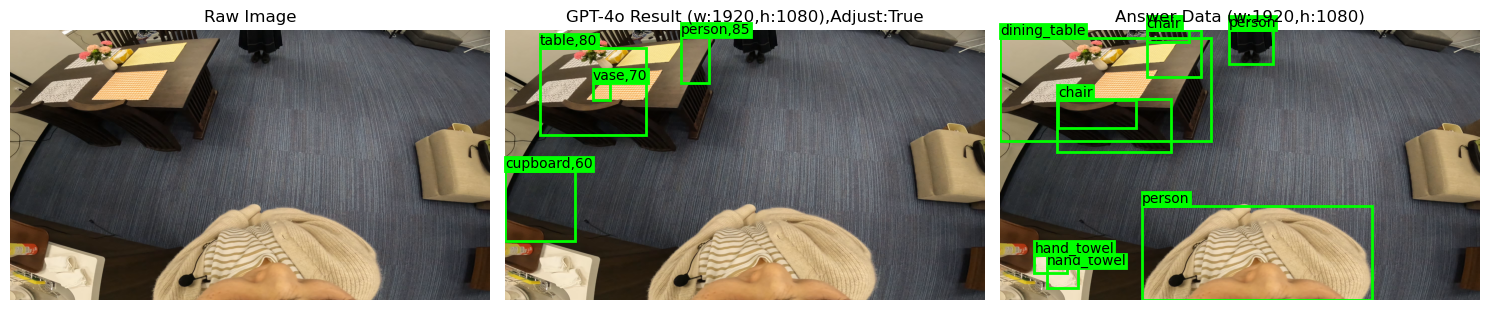

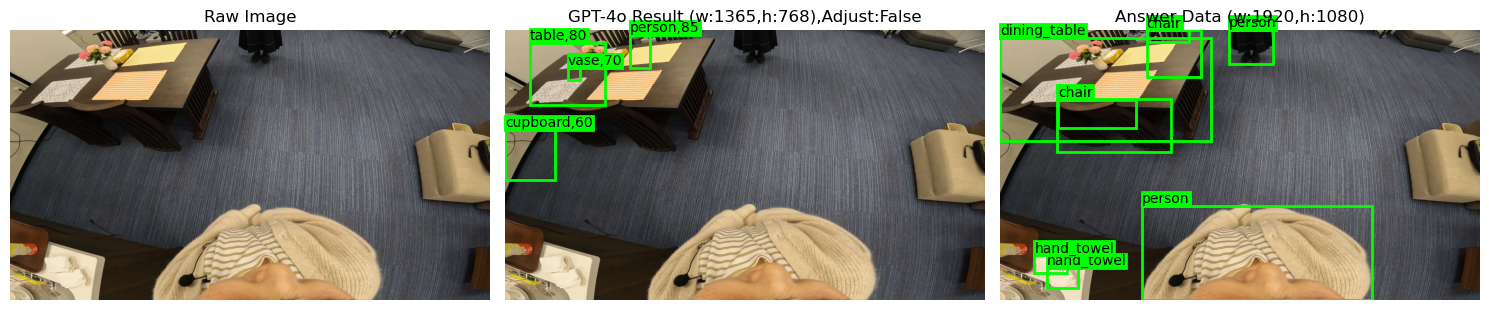

In [51]:

show_three_pics_by_json('001',True,compare=True)

(1920, 1080)
質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["table","vase","flowers","tablecloth","hand"],"x1_rect":[0,270,270,75,710],"x2_rect":[1365,445,370,540,770],"y1_rect":[200,85,80,250,600],"y2_rect":[768,295,150,510,670],"probability":[90,85,80,75,70],"size":[1365,768]}


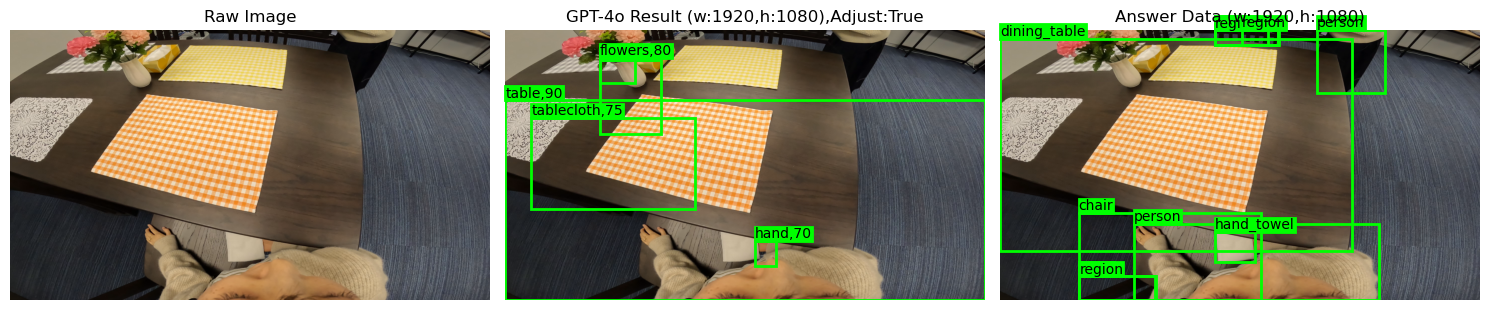

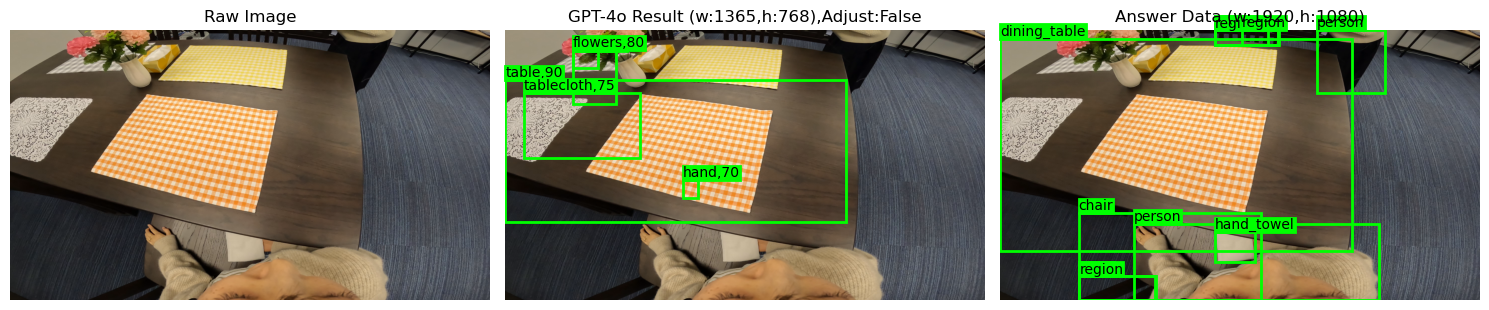

In [52]:
show_three_pics_by_json('030',True,compare=True)

(1920, 1080)
質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["person","table","vase","flower","chair","napkin"],"x1_rect":[300,450,800,820,500,260],"x2_rect":[700,1200,900,900,600,350],"y1_rect":[350,400,100,120,500,450],"y2_rect":[1000,900,300,200,700,500],"probability":[95,90,85,80,75,70],"size":[938,768]}


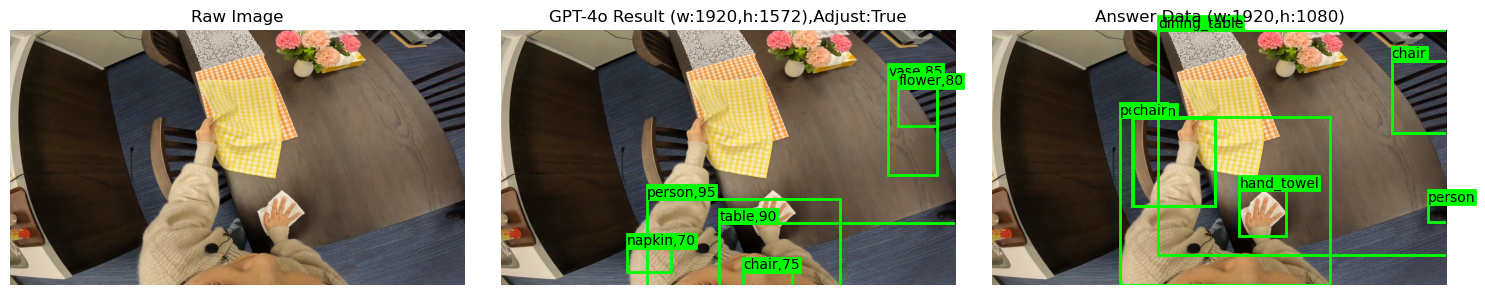

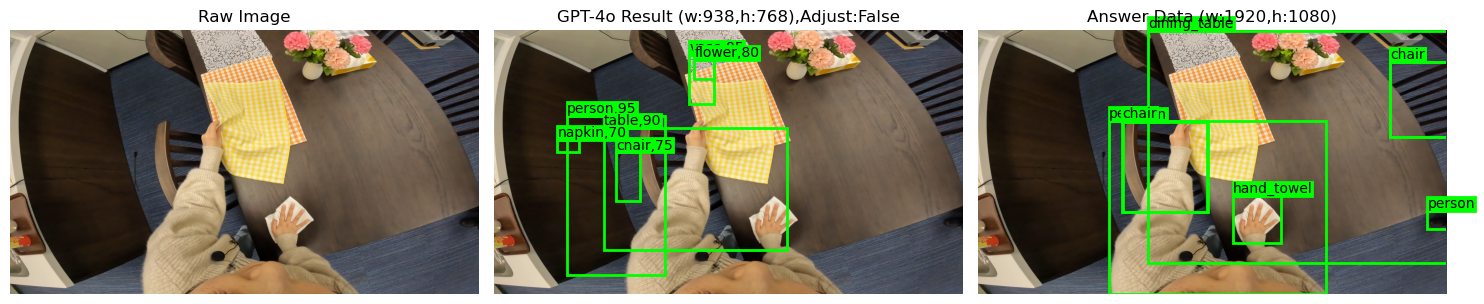

In [53]:
show_three_pics_by_json('070',True,compare=True)

In [124]:
IoUs_1 = []
preds = []
anss = []
start = 1
end = 83

for image_num in [f"{i:03}" for i in range(start, end + 1)]:
    pred,ans = get_pred_and_ans(image_num,adjust=True)
    preds.append(pred)
    anss.append(ans)
    IoUs_1 += get_IoU_list(pred,ans)

IoUs_1

質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["table","chair","flower vase","person","sofa"],"x1_rect":[141,408,262,600,875],"x2_rect":[710,514,332,735,1000],"y1_rect":[108,169,111,41,447],"y2_rect":[562,454,201,433,648],"probability":[95,85,90,88,80],"size":[1365,768]}
質問:Given an image, identify the objects as many as possible even with low confidence scores, and for each detected object, extract its name, corresponding bounding box coordinates, and the associated probability scores
回答:
{"name":["table","person","couch","vase","chair"],"x1_rect":[144,679,1095,281,147],"x2_rect":[640,875,1222,325,234],"y1_rect":[64,135,400,46,0],"y2_rect":[559,651,740,125,526],"probability":[95,88,85,84,75],"size":[1365,768]}
質問:Given an image, identify the objects as many as possible even with low confidence scores, a

[0.2809983054747809,
 0.17613760233346615,
 -1,
 0.07863589597744895,
 -1,
 0.38415194797866303,
 0.12088483177802381,
 -1,
 -1,
 0.11015771310114134,
 0.15795173396199694,
 0.15749140190561361,
 0.24687243244919155,
 -1,
 -1,
 0.13062781765143675,
 0.0,
 0.2369994439593154,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.16300723175355136,
 0.2074935937391786,
 -1,
 -1,
 0.4119985543910372,
 0.32370992564573253,
 0.07832415141665394,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.0,
 0.0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.0,
 -1,
 0.11567129421992838,
 -1,
 -1,
 0.1589282209666257,
 0.42257529704338215,
 -1,
 -1,
 -1,
 0.44591029023746703,
 0.41593004352084656,
 0.0,
 -1,
 -1,
 0.0,
 -1,
 0.008698130307176363,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.0510210563089529,
 -1,
 -1,
 -1,
 -1,
 0.11402369927881549,
 -1,
 -1,
 0.013883625154753783,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.0,
 0.0,
 -1,
 0.14983414393616784,
 -1,
 -1,
 -1,
 0.36235435768208

In [131]:
IoU1_not_negative_one = [x for x in IoUs_1 if x >= 0]
len(IoU1_not_negative_one)

214

Text(0.5, 1.0, 'IoU,Max=0.759,Num=457,Num of >= 0.5:15,Num of >= 0.7:2')

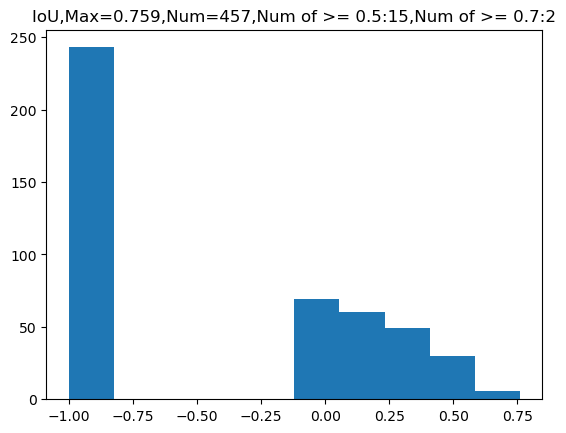

In [132]:
plt.hist(IoUs_1)
plt.title(f"IoU,Max={round(max(IoUs_1),3)},Num={len(IoUs_1)},Num of >= 0.5:{len([x for x in IoUs_1 if x >= 0.5])},Num of >= 0.7:{len([x for x in IoUs_1 if x >= 0.7])}")

Text(0.5, 1.0, 'IoU,Max=0.759,Num=214,Ave=0.2020696486355289\nNum of >= 0.5:15,Num of >= 0.7:2')

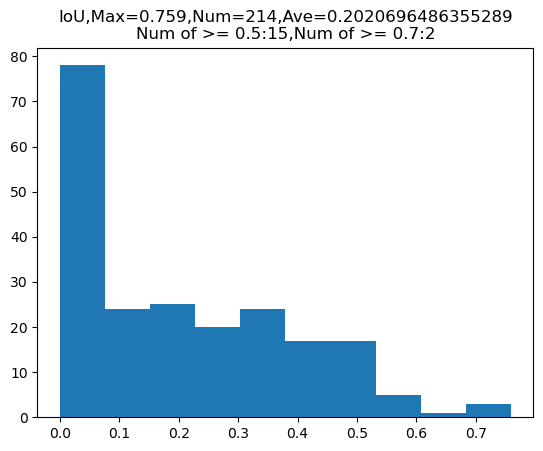

In [141]:
plt.hist(IoU1_not_negative_one)
plt.title(f"IoU,Max={round(max(IoU1_not_negative_one),3)},Num={len(IoU1_not_negative_one)},Ave={sum(IoU1_not_negative_one)/len(IoU1_not_negative_one)}\nNum of >= 0.5:{len([x for x in IoU1_not_negative_one if x >= 0.5])},Num of >= 0.7:{len([x for x in IoU1_not_negative_one if x >= 0.7])}")

In [127]:
#This is originally from https://output-zakki.com/apaverage_precision/#toc6
result = []
i = 0
for pred in preds:
    for pred_data in pred[1:]:
        result_save = []
        result_save.append(IoUs_1[i])
        result_save.append(pred_data[5])
        if IoUs_1[i] >= 0.5:
            result_save.append(True)
        else:
            result_save.append(False)
        result.append(result_save)
        i += 1


result


[[0.2809983054747809, 95, False],
 [0.17613760233346615, 85, False],
 [-1, 90, False],
 [0.07863589597744895, 88, False],
 [-1, 80, False],
 [0.38415194797866303, 95, False],
 [0.12088483177802381, 88, False],
 [-1, 85, False],
 [-1, 84, False],
 [0.11015771310114134, 75, False],
 [0.15795173396199694, 95, False],
 [0.15749140190561361, 88, False],
 [0.24687243244919155, 83, False],
 [-1, 75, False],
 [-1, 70, False],
 [0.13062781765143675, 92, False],
 [0.0, 85, False],
 [0.2369994439593154, 98, False],
 [-1, 76, False],
 [-1, 54, False],
 [-1, 70, False],
 [-1, 60, False],
 [-1, 80, False],
 [0.16300723175355136, 90, False],
 [0.2074935937391786, 85, False],
 [-1, 70, False],
 [-1, 60, False],
 [0.4119985543910372, 98, False],
 [0.32370992564573253, 97, False],
 [0.07832415141665394, 95, False],
 [-1, 92, False],
 [-1, 90, False],
 [-1, 88, False],
 [-1, 88, False],
 [-1, 85, False],
 [-1, 80, False],
 [-1, 90, False],
 [0.0, 85, False],
 [0.0, 80, False],
 [-1, 75, False],
 [-1, 85,

In [128]:
result_np = np.array(result,dtype=object)
result_filtered = result_np[result_np[:,0] >= 0]
result_filtered

array([[0.2809983054747809, 95, False],
       [0.17613760233346615, 85, False],
       [0.07863589597744895, 88, False],
       [0.38415194797866303, 95, False],
       [0.12088483177802381, 88, False],
       [0.11015771310114134, 75, False],
       [0.15795173396199694, 95, False],
       [0.15749140190561361, 88, False],
       [0.24687243244919155, 83, False],
       [0.13062781765143675, 92, False],
       [0.0, 85, False],
       [0.2369994439593154, 98, False],
       [0.16300723175355136, 90, False],
       [0.2074935937391786, 85, False],
       [0.4119985543910372, 98, False],
       [0.32370992564573253, 97, False],
       [0.07832415141665394, 95, False],
       [0.0, 85, False],
       [0.0, 80, False],
       [0.0, 52, False],
       [0.0, 55, False],
       [0.0, 70, False],
       [0.11567129421992838, 97, False],
       [0.1589282209666257, 95, False],
       [0.42257529704338215, 93, False],
       [0.44591029023746703, 95, False],
       [0.41593004352084656, 89, Fa

In [129]:
result_sorted = result_filtered[result_filtered[:, 1].argsort()[::-1]]
result_sorted

array([[0.5840431726771664, 99, True],
       [0.4119985543910372, 98, False],
       [0.3794947031728094, 98, False],
       [0.0, 98, False],
       [0.1928723965888715, 98, False],
       [0.05830251813658888, 98, False],
       [0.3276601998824221, 98, False],
       [0.05941385857331801, 98, False],
       [0.2369994439593154, 98, False],
       [0.0, 97, False],
       [0.11567129421992838, 97, False],
       [0.32370992564573253, 97, False],
       [0.5301556298438693, 96, True],
       [0.06465069224053106, 96, False],
       [0.0510210563089529, 96, False],
       [0.2090301501881535, 95, False],
       [0.36869416020905177, 95, False],
       [0.46091719948516374, 95, False],
       [0.322339151266256, 95, False],
       [0.37249614491635774, 95, False],
       [0.5029951707580701, 95, True],
       [0.5312648535942954, 95, True],
       [0.5772865525681965, 95, True],
       [0.3125265998749229, 95, False],
       [0.2809983054747809, 95, False],
       [0.3708608583963431, 

Text(0.5, 1.0, 'Precision-Recall curve, AP=0.00483510221207337')

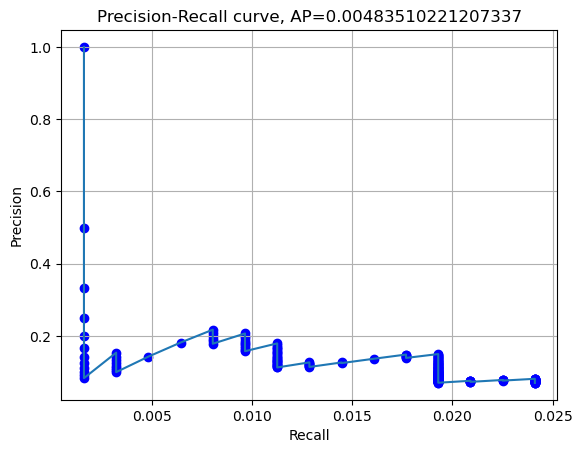

In [130]:
#This is originally from https://output-zakki.com/apaverage_precision/#toc6
numGT = 0
for ans in anss:
    numGT += len(ans)-1
    

# "Is correct?"の列をpandasのデータフレームで扱う
correct = pd.Series(result_sorted[:,2],dtype = bool)

TP = correct
FP = ~correct 
#累積和
accTP = TP.cumsum() 
accFP = FP.cumsum()

#Precision, Recallの計算
precision = accTP / (accTP + accFP)
recall = accTP / numGT #分母はGTの個数



plt.plot(recall, precision)
plt.scatter(recall, precision, color="b")
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")

# Get AP
extend_recall = np.concatenate([[0],recall,[1]])
extend_precision = np.concatenate([[0], precision, [0]])
ap = 0
for i in range(1, len(extend_recall)):
    dr = extend_recall[i] - extend_recall[i-1]
    ap += dr * extend_precision[i]
    

plt.title(f"Precision-Recall curve, AP={ap}")

In [33]:
#SOM promptiong

def get_img_as_grid_and_digit(image_num, rows=10, cols=10,save = False):

    # 画像を読み込む
    image = Image.open(get_image_path(image_num))

    # 画像のサイズを取得
    width, height = image.size

    # グリッドのセルサイズ
    cell_width = width // cols
    cell_height = height // rows

    # 画像に描画を行うためのDrawオブジェクトを作成
    draw = ImageDraw.Draw(image)

    # フォントの設定（システムにあるフォントを使用）
    try:
        font = ImageFont.truetype("arial.ttf", 1000)  # フォントサイズを大きく
    except IOError:
        font = ImageFont.load_default()

    # グリッド線と数字ラベルを描画
    for row in range(rows):
        for col in range(cols):
            # セルの座標
            x1 = col * cell_width
            y1 = row * cell_height
            x2 = x1 + cell_width
            y2 = y1 + cell_height

            #draw.rectangle([x1, y1, x2, y2], outline="white")
            # 中央に数字ラベルを配置
            label = str(row * cols + col + 1)  # 数字ラベル
            bbox = draw.textbbox((0, 0), label, font=font)
            text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]
            text_x = x1 + (cell_width - text_width) / 2
            text_y = y1 + (cell_height - text_height) / 2

            # 黒い背景を描画

            padding = 5  # 背景に余白を追加する場合のパディング
            background_x1 = text_x - padding
            background_y1 = text_y - padding
            background_x2 = text_x + text_width + padding
            background_y2 = text_y + text_height + padding
            draw.rectangle([background_x1, background_y1, background_x2, background_y2], fill="black")

      


            # 数字を描画
            draw.text((text_x, text_y), label, fill="red", font=font)
    
    if save:
        image.save(f"output{image_num}.jpg")

    return image



def create_vision_chat_by_som(question,image_num, row=10,col=10,temperature=1):

    try:

        image_with_grid = get_img_as_grid_and_digit(image_num, row, col)
        buffered = BytesIO()
        image_with_grid.save(buffered, format="PNG")
        base64_image = base64.b64encode(buffered.getvalue()).decode("utf-8")


        messages = [
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": question},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
                    },
                ],
            }
        ]

        res = client.beta.chat.completions.parse(
            model="gpt-4o",
            messages=messages,
            
            response_format = {
                "type": "json_schema",
                "json_schema": {
                    "name": "ObjectRecognitionResults",
                    "schema": {
                        "type": "object",
                        "properties": {
                            "name": {
                                "type": "array",
                                "items": {
                                    "type": "string"
                                },
                                "description":"A list of object names detected in the image, based on the LVIS (Large Vocabulary Instance Segmentation) dataset, including as many as possible, even with low confidence scores."
                            },
                            "numbers": {
                                "type": "array",
                                "items": {
                                    "type": "array",
                                    "items": {
                                        "type": "integer"
                                    }
                                },
                                "description":  "List of grid cell numbers, where each inner array represents a set of integer values that correspond to object's bounding box being detected."
                            },
                            "probability": {
                                "type": "array",
                                "items": {
                                    "type": "integer"
                                },
                                "description": "An array of probability values, each representing the likelihood of the corresponding object being correctly detected."
                            },
                            "size": {
                                "type": "array",
                                "items": {
                                    "type": "integer"
                                },
                                "description": "An array of image sizes (width and height) to retrieve."
                            } 
                        },
                    }
                }   
            },

            temperature = temperature,
            max_tokens=300
        )
        return res.choices[0].message.content
    except Exception as e:
        return f"画像の処理中にエラーが発生しました: {str(e)}"



In [34]:
# prompt som
def prompt_som(image_num,row=10,col=10):
    question= "Given an image, identify as many objects as possible. For each detected object, provide its name, grid cell numbers (bounding box), and associated probability scores. Note that the image is divided into a 10x10 grid. Grid cells are numbered starting from the top-left corner as 1, increasing from left to right. Upon reaching the rightmost cell, numbering continues from the leftmost cell of the next row down. This pattern continues until the bottom of the grid is reached."
    response = create_vision_chat_by_som(question, image_num,row=row,col=col)
    print("質問:"+question+"\n回答:")
    print(response)
    return response



def get_pred_and_ans_som(image_num,row=10,col=10):
    #pred = [[width,height]['object_name','x1','y1','x2','y2','probability',image_num], ...]
    #answer = [[width,height]['object_name','x1','y1','x2','y2',-1,image_num,instanceId], ...]   

    # ask gpt-4o
    res = prompt_som(image_num,row,col)
    data = json.loads(res)

    #get answer
    ans = get_answer_cols(image_num)

    # show gpt-4o result
    pred = change_result_to_list(res, image_num,som = True)

    return pred,ans



def show_three_pics_by_json_som(image_num,row=10,col=10,save=False):
    img = get_img_as_grid_and_digit(image_num,row,col)

    # show size
    image = np.array(img)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    

    # show raw image
    axes[0].imshow(image)
    axes[0].set_title("Raw Image")
    axes[0].axis("off")

    result,ans = get_pred_and_ans_som(image_num)
    
    bboxes, objects = get_bboxes_and_objects(result)
    add_bboxes_to_image(axes[1], np.uint8(image), bboxes, objects)
    axes[1].set_title(f"GPT-4o Result by SOM")
    axes[1].axis("off")

    # show answer data
    bboxes, objects = get_bboxes_and_objects(ans)
    add_bboxes_to_image(axes[2], np.uint8(image), bboxes, objects)
    axes[2].set_title(f"Answer Data")
    axes[2].axis("off")

    # show
    plt.tight_layout()
    plt.show()
    

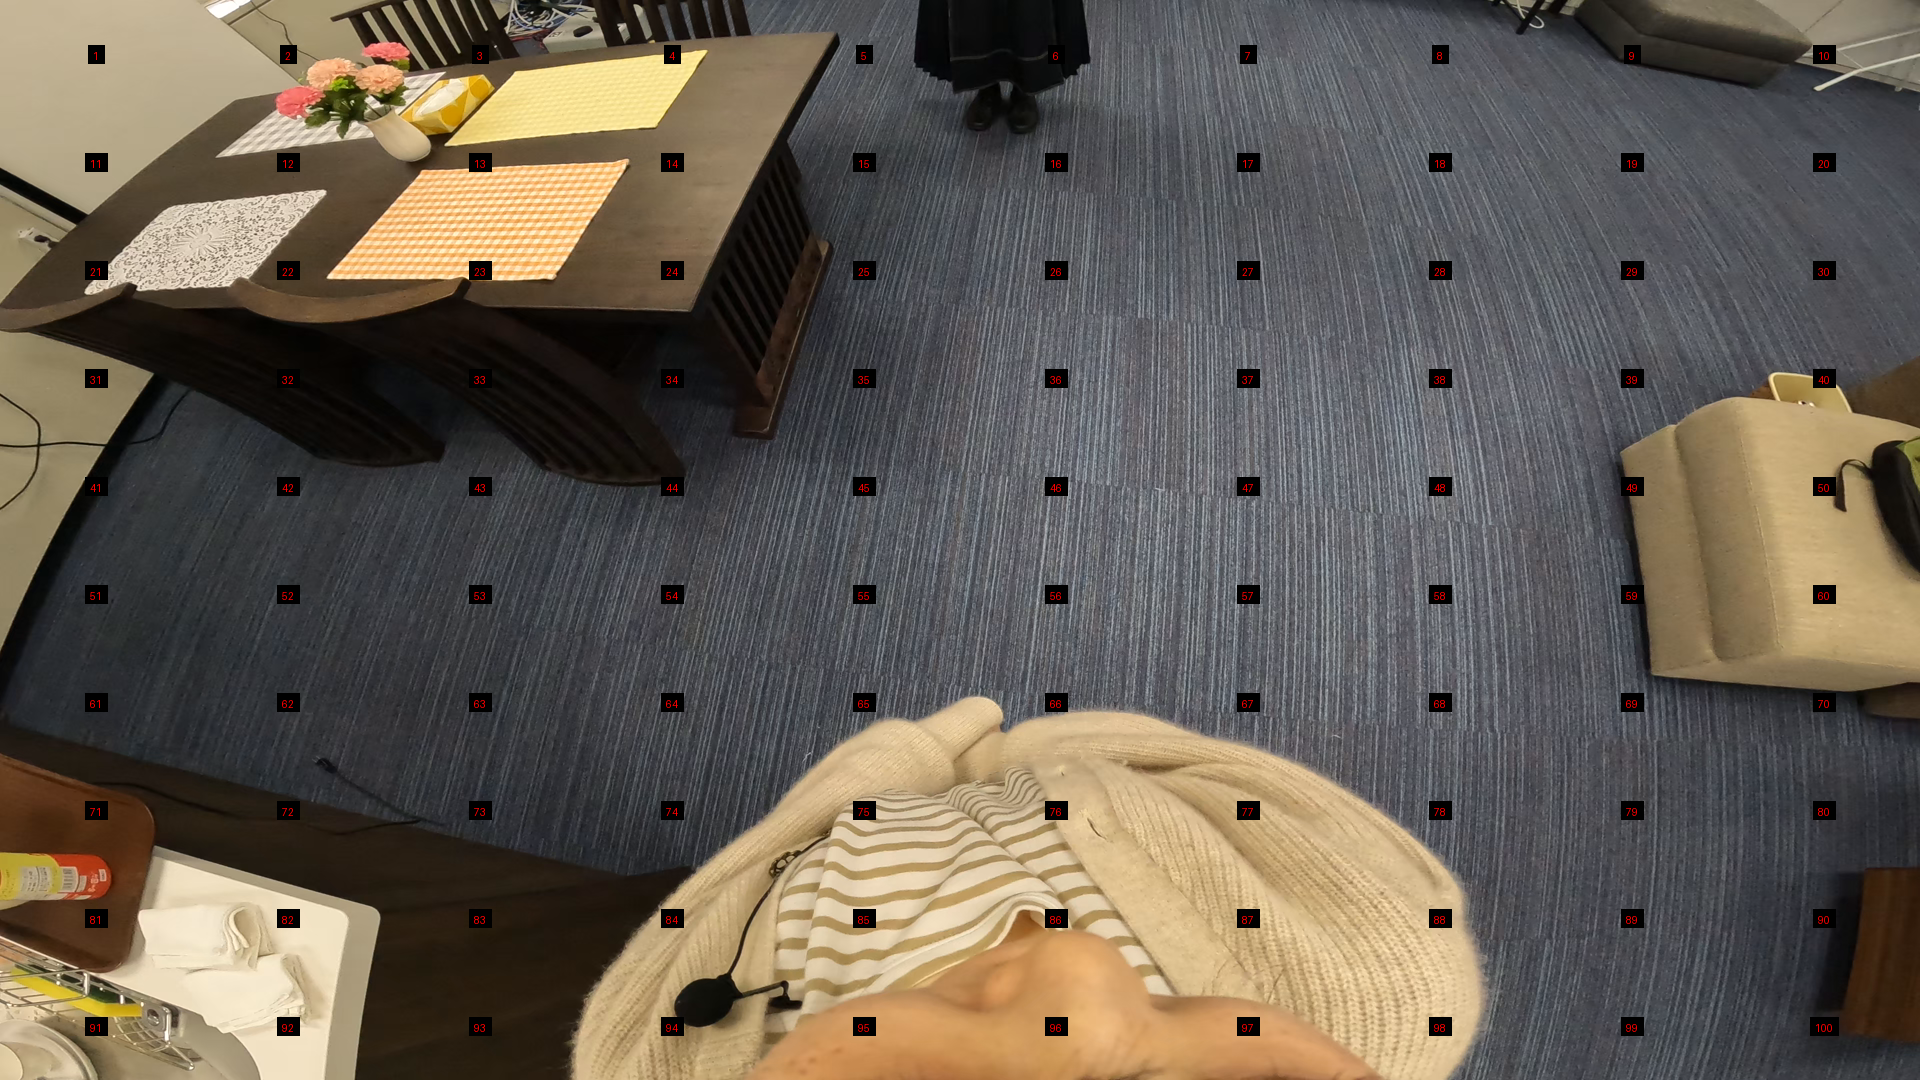

In [35]:
get_img_as_grid_and_digit('001',save=True)

質問:Given an image, identify as many objects as possible. For each detected object, provide its name, grid cell numbers (bounding box), and associated probability scores. Note that the image is divided into a 10x10 grid. Grid cells are numbered starting from the top-left corner as 1, increasing from left to right. Upon reaching the rightmost cell, numbering continues from the leftmost cell of the next row down. This pattern continues until the bottom of the grid is reached.
回答:
{"name":["table","chair","vase","flowers","plate","floor","jacket","microphone","carpet","sofa"],"numbers":[[13,14,23,24,33,34],[3,4],[12],[13],[14],[5,6,7,8,9,10,15,16,17,18,19,20,25,26,27,28,29,30,35,36,37,38,39,40,45,46,47,48,49,50,55,56,57,58,59,60,65,66,67,68,69,70,75,76,77,78,79,80,85,86,87,88,89,90,95,96,97,98,99,100],[94,95,96,97],[84],[11,12,13,14,15,21,22,23,24,25],[39,40,49,50,59,60]],"probability":[95,92,90,88,85,80,75,70,65,60],"size":[2500,2500]}


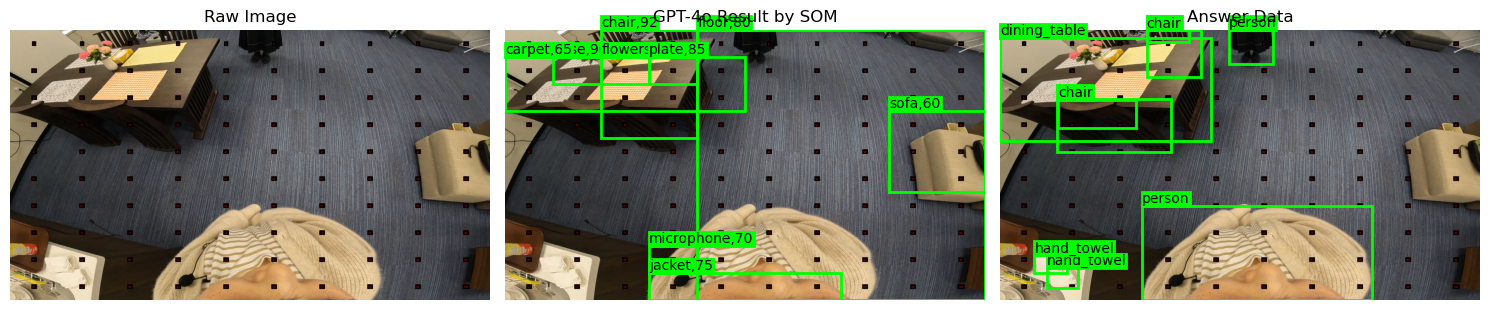

In [36]:
show_three_pics_by_json_som('001')

質問:Given an image, identify as many objects as possible. For each detected object, provide its name, grid cell numbers (bounding box), and associated probability scores. Note that the image is divided into a 10x10 grid. Grid cells are numbered starting from the top-left corner as 1, increasing from left to right. Upon reaching the rightmost cell, numbering continues from the leftmost cell of the next row down. This pattern continues until the bottom of the grid is reached.
回答:
{"name":["flowers","vase","table","tablecloth","person"],"numbers":[[2,12],[12],[1,2,3,4,11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44,51,52,53,54,61,62,63,64,71,72,73,74,81,82,83,84],[14,15,16,24,25,26],[74,84,85,86,87]],"probability":[85,80,95,90,85],"size":[[1365,768]]}


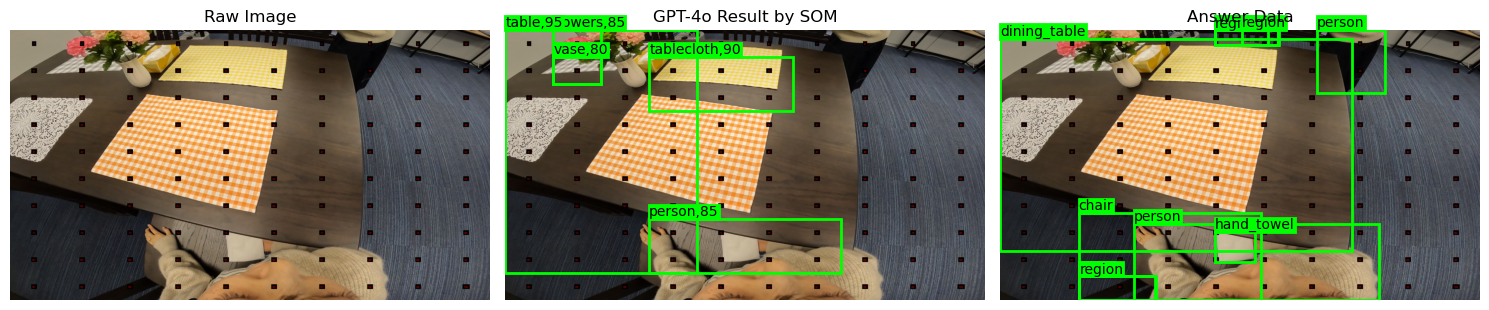

In [37]:
show_three_pics_by_json_som('030')

質問:Given an image, identify as many objects as possible. For each detected object, provide its name, grid cell numbers (bounding box), and associated probability scores. Note that the image is divided into a 10x10 grid. Grid cells are numbered starting from the top-left corner as 1, increasing from left to right. Upon reaching the rightmost cell, numbering continues from the leftmost cell of the next row down. This pattern continues until the bottom of the grid is reached.
回答:
{"name":["table","flower","napkin","hand","shirt","chair","placemat"],"numbers":[[5,6,15,16,17,18,19,28,29,37,38,47,48,56,57,58,59,68,69,78,79,87,88,89,98],[7,8,17],[66,67,68],[66,67,68,76],[84,85,86],[4,14,15,25,35,36,46,55],[5,6,7,15,16,25,26,35]],"probability":[95,88,85,90,92,86,80],"size":[1365,768]}


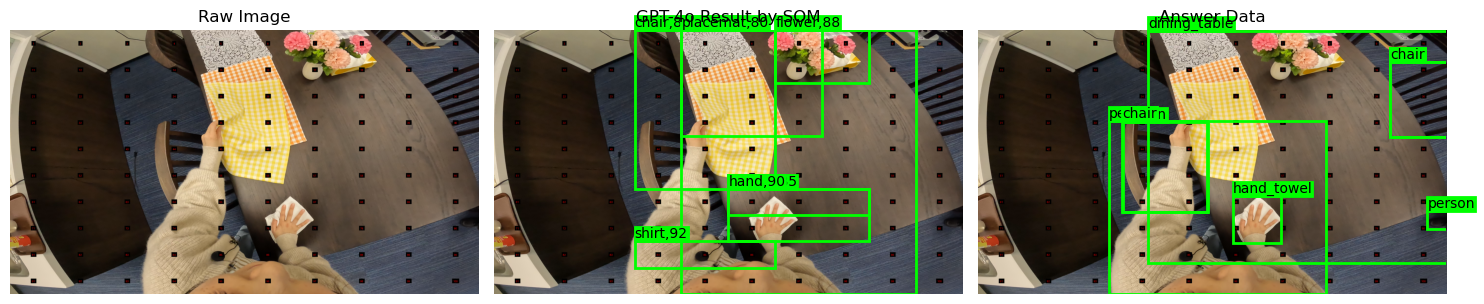

In [38]:
show_three_pics_by_json_som('070')

In [54]:
IoUs = []
preds = []
anss = []
start = 1
end = 83

for image_num in [f"{i:03}" for i in range(start, end + 1)]:
    try:
        pred,ans = get_pred_and_ans_som(image_num)
        preds.append(pred)
        anss.append(ans)
        IoUs += get_IoU_list(pred,ans)
    except Exception as e:
        # エラーが発生した場合はメッセージを表示して、次のループに進む
        print(f"エラーが発生しました: {e}")
        continue


IoUs

質問:Given an image, identify as many objects as possible. For each detected object, provide its name, grid cell numbers (bounding box), and associated probability scores. Note that the image is divided into a 10x10 grid. Grid cells are numbered starting from the top-left corner as 1, increasing from left to right. Upon reaching the rightmost cell, numbering continues from the leftmost cell of the next row down. This pattern continues until the bottom of the grid is reached.
回答:
{"name":["table","flower vase","paper","sofa","person","carpet"],"numbers":[[11,12,13,21,22,23,31,32,33],[12],[3,13,14],[9,10,19,20],[5,6,16,17],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100]],"probability":[95,90,85,88,92,99],"size":[1000,1000]}
質問:Given an image, ident

[0.5392790887182065,
 -1,
 -1,
 -1,
 0.19347993827160495,
 -1,
 -1,
 -1,
 0.5360078581398956,
 0.11685652118264431,
 -1,
 -1,
 -1,
 -1,
 0.2786285210297117,
 0.22073716844643473,
 -1,
 -1,
 -1,
 0.11558585698430315,
 0.0,
 -1,
 -1,
 -1,
 -1,
 0.637655586019734,
 0.2513291445142581,
 -1,
 0.1513313770242365,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.3435805875669534,
 -1,
 -1,
 0.19279454722492698,
 0.17796019749795536,
 -1,
 0.6018516721336931,
 0.0,
 0.30070300098268954,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.1753259631982958,
 0.16151086978062265,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.0,
 -1,
 0.135111941240314,
 -1,
 -1,
 0.19167610288170453,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.35401856138985066,
 0.7336116910229645,
 0.2807283557842009,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0.5989428381618093,
 0.3166148102053516,
 -1,
 -1,
 -1,
 0.273201581027668,
 -1,
 -1,
 -1,
 -1,
 0.20173570673280738,
 0.0,
 -1,
 0.2672646604938

In [56]:
IoU_not_negative_one = [x for x in IoUs if x >= 0]
len(IoU_not_negative_one)

208

Text(0.5, 1.0, 'IoU,Max=0.856,Num=542,Num of >= 0.5:29,Num of >= 0.7:6')

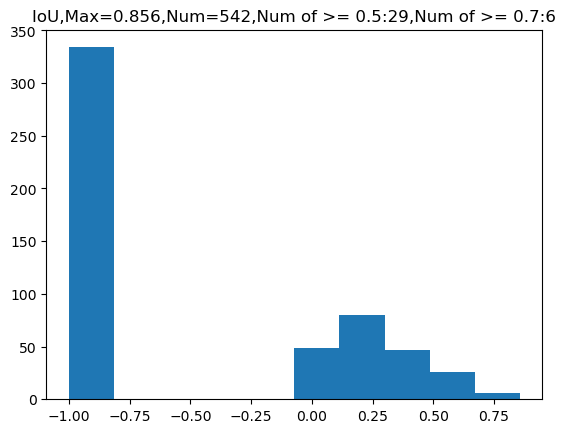

In [57]:
plt.hist(IoUs)
plt.title(f"IoU,Max={round(max(IoUs),3)},Num={len(IoUs)},Num of >= 0.5:{len([x for x in IoUs if x >= 0.5])},Num of >= 0.7:{len([x for x in IoUs if x >= 0.7])}")

Text(0.5, 1.0, 'IoU by SOM,Max=0.856,Num=208,Ave=0.2643263864080909\nNum of >= 0.5:29,Num of >= 0.7:6')

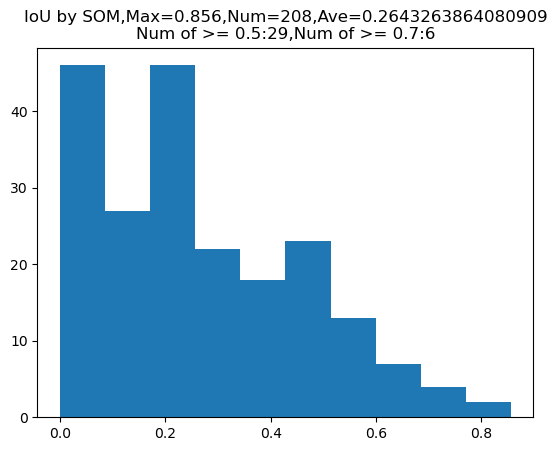

In [60]:
plt.hist(IoU_not_negative_one)
plt.title(f"IoU by SOM,Max={round(max(IoU_not_negative_one),3)},Num={len(IoU_not_negative_one)},Ave={sum(IoU_not_negative_one)/len(IoU_not_negative_one)}\nNum of >= 0.5:{len([x for x in IoU_not_negative_one if x >= 0.5])},Num of >= 0.7:{len([x for x in IoU_not_negative_one if x >= 0.7])}")

Text(0.5, 1.0, 'Precision-Recall curve by SOM, AP=0.010519037268911681')

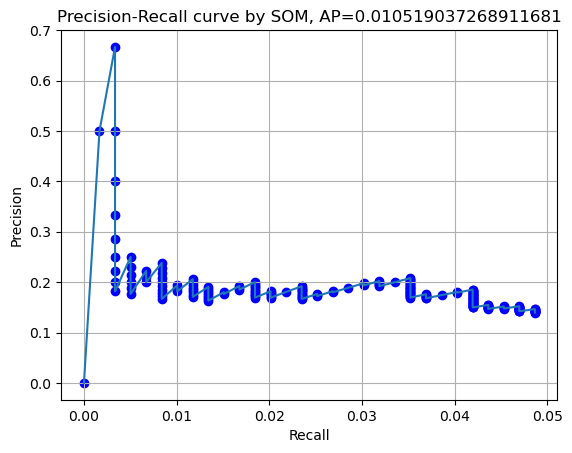

In [61]:
#This is originally from https://output-zakki.com/apaverage_precision/#toc6

result = []
i = 0
for pred in preds:
    for pred_data in pred[1:]:
        result_save = []
        result_save.append(IoUs[i])
        result_save.append(pred_data[5])
        if IoUs[i] >= 0.5:
            result_save.append(True)
        else:
            result_save.append(False)
        result.append(result_save)
        i += 1

result_np = np.array(result,dtype=object)
result_filtered = result_np[result_np[:,0] >= 0]
result_sorted = result_filtered[result_filtered[:, 1].argsort()[::-1]]
numGT = 0
for ans in anss:
    numGT += len(ans)-1
    

# "Is correct?"の列をpandasのデータフレームで扱う
correct = pd.Series(result_sorted[:,2],dtype = bool)

TP = correct
FP = ~correct 
#累積和
accTP = TP.cumsum() 
accFP = FP.cumsum()

#Precision, Recallの計算
precision = accTP / (accTP + accFP)
recall = accTP / numGT #分母はGTの個数



plt.plot(recall, precision)
plt.scatter(recall, precision, color="b")
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")

# Get AP
extend_recall = np.concatenate([[0],recall,[1]])
extend_precision = np.concatenate([[0], precision, [0]])
ap = 0
for i in range(1, len(extend_recall)):
    dr = extend_recall[i] - extend_recall[i-1]
    ap += dr * extend_precision[i]
    

plt.title(f"Precision-Recall curve by SOM, AP={ap}")